## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import re
import random
from sklearn.model_selection import KFold
from sklearn.svm import SVR
 

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor 

from sklearn.model_selection import GridSearchCV, cross_val_score


from numpy import mean
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

In [2]:
random.seed(111)

# Reading Data

In [3]:
available_ip = pd.read_csv('available_input_corr.csv')
available_ip = available_ip.drop(available_ip.columns[0], axis=1)
available_op = pd.read_csv('available_output_corr.csv')
available_op = available_op.drop(available_op.columns[0], axis = 1)
type(available_op.VALUE[0])

numpy.float64

## Normalisation of data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.2, random_state = 111)

scaler_feature = StandardScaler()
scaler_label = StandardScaler()
scaled_train_feature = scaler_feature.fit_transform(X_train)
scaled_train_label = scaler_label.fit_transform(y_train)
scaled_test_feature = scaler_feature.fit_transform(X_test)
scaled_test_label = scaler_label.fit_transform(y_test)

## Applying Linear Regression to train the model

In [5]:
Linear_Regression_Model = LinearRegression()
val_score = cross_val_score(Linear_Regression_Model, scaled_train_feature, scaled_train_label, cv = 5,scoring= 'neg_mean_squared_error')
print(f'Cross Validation Score for LR is: {abs(np.array(val_score).mean())}')

Cross Validation Score for LR is: 0.20838656566849267


### Applying Support Vector Regression to train the model

### Parameter Tuning for SVR

Cross Validation Score for SVR is: 0.3732999538221743 C =  0.1
Cross Validation Score for SVR is: 0.20727533567990367 C =  0.2
Cross Validation Score for SVR is: 0.17571664232080675 C =  0.3
Cross Validation Score for SVR is: 0.15049333711263252 C =  1
Cross Validation Score for SVR is: 0.1502210516871648 C =  2
Cross Validation Score for SVR is: 0.15214800132433212 C =  3
Cross Validation Score for SVR is: 0.15509909940524053 C =  4
Cross Validation Score for SVR is: 0.15944903720699108 C =  5
Cross Validation Score for SVR is: 0.16313639221953083 C =  6
Cross Validation Score for SVR is: 0.16840763208429438 C =  7
Cross Validation Score for SVR is: 0.1732216294850756 C =  8
Cross Validation Score for SVR is: 0.17617847455349744 C =  9


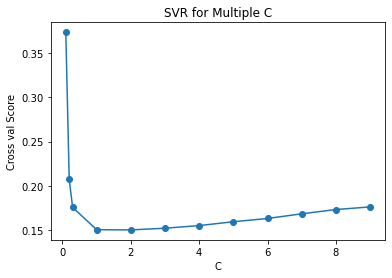

In [6]:
score = []
c_range = [0.1, 0.2, 0.3, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for c in c_range:
    SVR_Model = SVR(kernel='rbf', C = c)
    val_score = cross_val_score(SVR_Model, scaled_train_feature, scaled_train_label, cv = 5,scoring = 'neg_mean_squared_error')
    score.append(abs(np.array(val_score).mean()))
    print(f'Cross Validation Score for SVR is: {abs(np.array(val_score).mean())}', "C = ", c)
plt.plot(c_range, score,marker = 'o')
plt.xlabel("C")
plt.ylabel("Cross val Score")
plt.title("SVR for Multiple C")
plt.show()

Cross Validation Score for SVR is: 0.21664676634816252 C =  0.1
Cross Validation Score for SVR is: 0.21702644394257448 C =  0.2
Cross Validation Score for SVR is: 0.21729675613258972 C =  0.3
Cross Validation Score for SVR is: 0.21728031373328965 C =  1
Cross Validation Score for SVR is: 0.21726770848925053 C =  2
Cross Validation Score for SVR is: 0.21725095139745138 C =  3
Cross Validation Score for SVR is: 0.2172394511973193 C =  4
Cross Validation Score for SVR is: 0.21724160336428802 C =  5
Cross Validation Score for SVR is: 0.2172501373326165 C =  6
Cross Validation Score for SVR is: 0.21725228205623331 C =  7
Cross Validation Score for SVR is: 0.21729445784982082 C =  8
Cross Validation Score for SVR is: 0.21726598409561865 C =  9


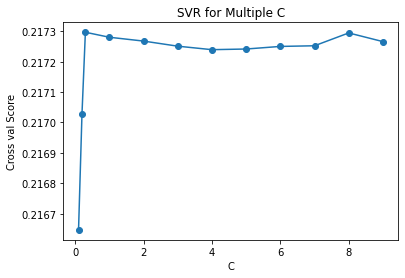

In [7]:
score = []
c_range = [0.1, 0.2, 0.3, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for c in c_range:
    SVR_Model = SVR(kernel='linear', C = c)
    val_score = cross_val_score(SVR_Model, scaled_train_feature, scaled_train_label, cv = 5,scoring = 'neg_mean_squared_error')
    score.append(abs(np.array(val_score).mean()))
    print(f'Cross Validation Score for SVR is: {abs(np.array(val_score).mean())}', "C = ", c)
plt.plot(c_range, score,marker = 'o')
plt.xlabel("C")
plt.ylabel("Cross val Score")
plt.title("SVR for Multiple C")
plt.show()

### Tuned  SVR Model kernel = 'rbf' C= 2

In [11]:
SVR_Model = SVR(kernel='rbf', C = 2)
val_score = cross_val_score(SVR_Model, scaled_train_feature, scaled_train_label, cv = 5,scoring = 'neg_mean_squared_error')
print(f'Mean Square Error for SVR is: {abs(val_score.mean())}')


Mean Square Error for SVR is: 0.1502210516871648


## Applying Decision Tree Model 

### Parameter Tuning for Decision Tree

In [8]:
from sklearn.tree import DecisionTreeRegressor 
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


model = DecisionTreeRegressor()
model.fit(available_ip,available_op)



parameters={"splitter":["best","random"],
            "max_depth" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
           "max_features":["auto","log2","sqrt",None] }

hyper_param_model = GridSearchCV(model, param_grid=parameters, scoring='neg_mean_squared_error',cv=3,verbose=3)

hyper_param_model.fit(scaled_train_feature, scaled_train_label)

print("The best Params for the decision tree ", hyper_param_model.best_params_)



Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV 1/3] END ..max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV 2/3] END ..max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV 3/3] END ..max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, splitter=random; total time=   0.0s
[CV 1/3] END ..max_depth=1, max_features=log2, splitter=best; total time=   0.0s
[CV 2/3] END ..max_depth=1, max_features=log2, splitter=best; total time=   0.0s
[CV 3/3] END ..max_depth=1, max_features=log2, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_features=log2, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_features=log2, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_features=log2, sp

[CV 1/3] END ..max_depth=6, max_features=sqrt, splitter=best; total time=   0.0s
[CV 2/3] END ..max_depth=6, max_features=sqrt, splitter=best; total time=   0.0s
[CV 3/3] END ..max_depth=6, max_features=sqrt, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=sqrt, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=sqrt, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=sqrt, splitter=random; total time=   0.0s
[CV 1/3] END ..max_depth=6, max_features=None, splitter=best; total time=   0.0s
[CV 2/3] END ..max_depth=6, max_features=None, splitter=best; total time=   0.0s
[CV 3/3] END ..max_depth=6, max_features=None, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=6, max_features=None, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=6, max_features=None, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=6, max_features=None, splitter=random; total time=   0.0s
[CV 1/3] END ..max_depth=7, 

# Tuned Decision Tree Model and Feature Importance using Decision Tree

Cross Validation Score for Decision Tree is: 0.16272906921890498


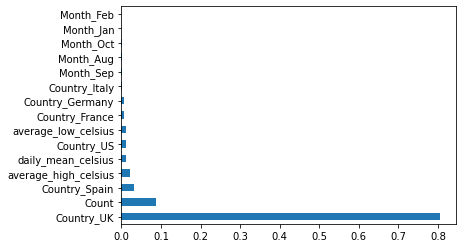

In [9]:
from sklearn.tree import DecisionTreeRegressor 
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


model = DecisionTreeRegressor(max_depth = 6, max_features = 'auto', splitter = 'best')
model.fit(available_ip,available_op)
val_score = cross_val_score(model, scaled_train_feature, scaled_train_label, cv = 5,scoring = 'neg_mean_squared_error')
print(f'Cross Validation Score for Decision Tree is: {abs(np.array(val_score).mean())}')

plt.figure()
feat_importances = pd.Series(model.feature_importances_, index=available_ip.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()




# Feature Importance with univariate selection

In [12]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = available_ip
y = available_op
y = y.astype(int)
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(28,'Score'))  #print 10 best features

                   Specs        Score
0                  Count  9591.295417
26            Country_UK  1598.000000
2    average_low_celsius  1590.754951
3     daily_mean_celsius  1432.839021
23         Country_Spain  1337.914286
27            Country_US  1232.800000
1   average_high_celsius  1218.349344
18       Country_Germany  1181.600000
17        Country_France  1141.000000
9              Month_Jul  1059.173077
5              Month_Aug  1057.996154
15             Month_Sep  1037.400000
10             Month_Jun  1016.607692
4              Month_Apr  1012.320330
14             Month_Oct  1001.375000
21        Country_Poland   998.657143
12             Month_May   986.231868
20   Country_Netherlands   965.000000
13             Month_Nov   930.825000
19         Country_Italy   919.400000
6              Month_Dec   914.037500
8              Month_Jan   905.780769
16       Country_Belgium   887.314286
22      Country_Portugal   880.200000
25           Country_UAE   878.457143
11          